In [1]:
from Generators.BL import BL
from Samplers.IAF_KernelBased import IAF_KernelBased
import numpy as np
import plots

# Example

In [2]:
dur = 0.5

dt = 0.001

f_max = 64

N_c = 3

In [3]:
bl = BL(dur, dt, f_max, N_c)
t, u = bl.generate(normalized=True)

In [4]:
alpha = 1
theta = 0.001

gamma = 0.5
Ts = 1/(10*f_max)

In [5]:
iaf_kernel_based = IAF_KernelBased(alpha, theta, gamma, Ts)

iaf_kernel_based.setSignal(t, u, dt)

spikes = iaf_kernel_based.encode()

u_rec = iaf_kernel_based.decode()

iaf_kernel_based.summary()

Integrate-and-Fire Sampler - KernelBased
From "APPROXIMATE RECONSTRUCTION OF BANDLIMITED FUNCTIONS FOR THE INTEGRATE AND FIRE SAMPLER"
Hans G. Feichtinger, 2009
Status: DECODED
Parameters:
Firing parameter 'alpha': 1
Threshold 'theta': 0.001


/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/scipy/signal/waveforms.py:658: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


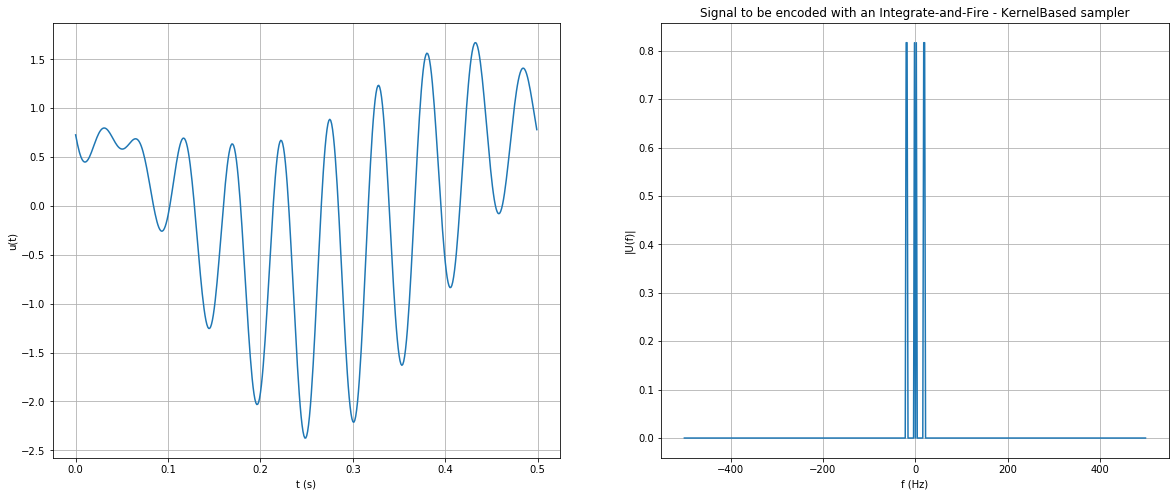

In [6]:
iaf_kernel_based.plotSignal()

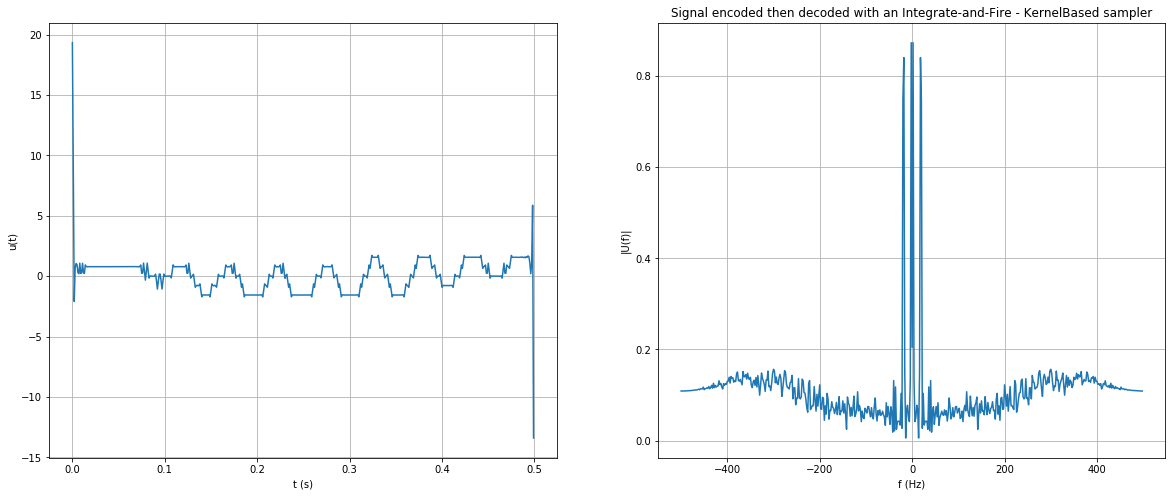

In [7]:
iaf_kernel_based.plotRecoveredSignal()

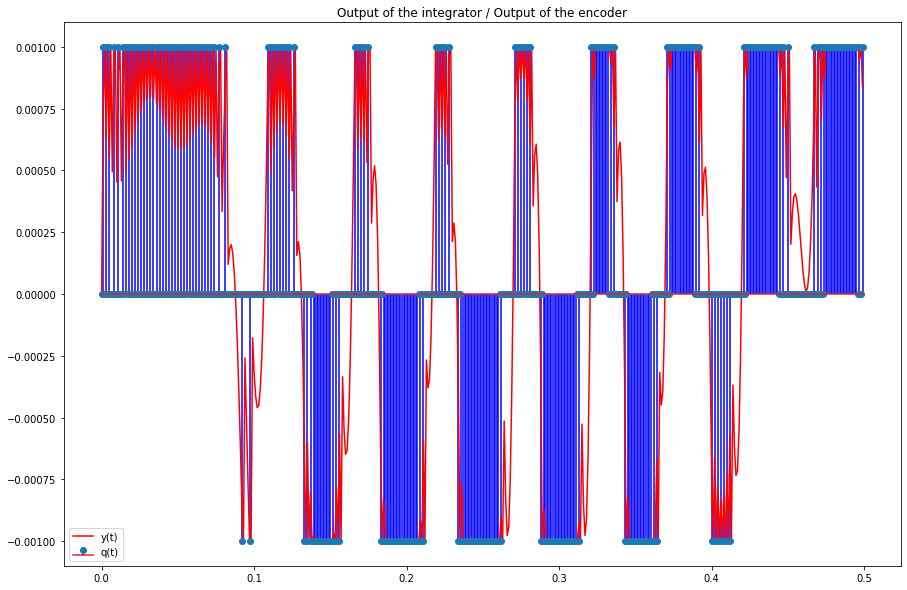

In [8]:
iaf_kernel_based.plotIntegralAndEncoderOutput()

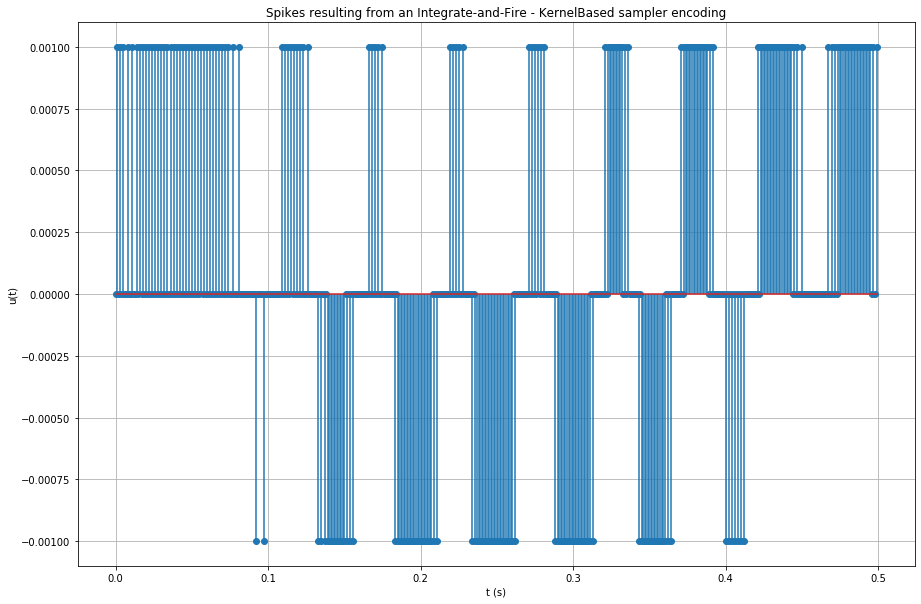

In [9]:
iaf_kernel_based.plotSpikes()

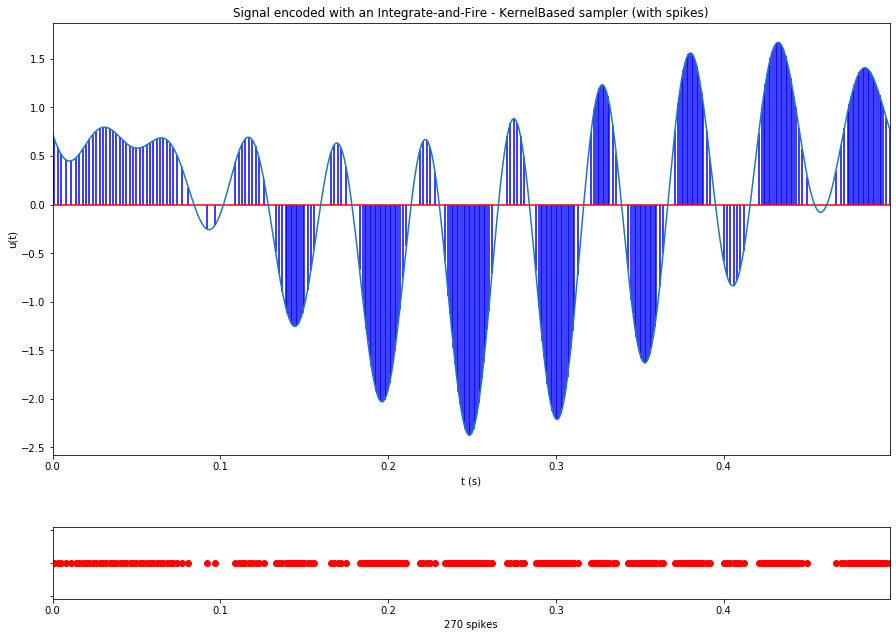

In [10]:
iaf_kernel_based.plotSignalAndSpikes()

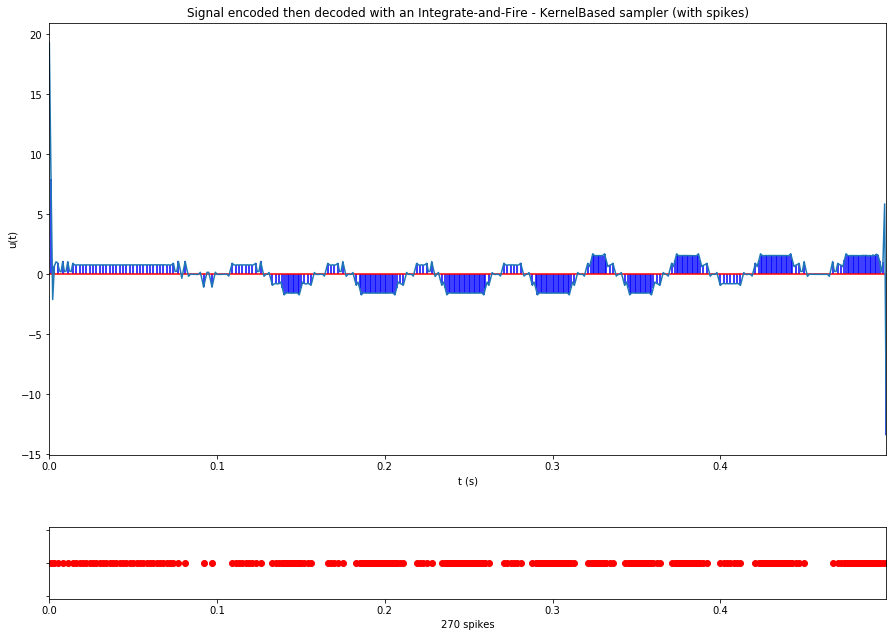

In [11]:
iaf_kernel_based.plotRecoveredSignalAndSpikes()

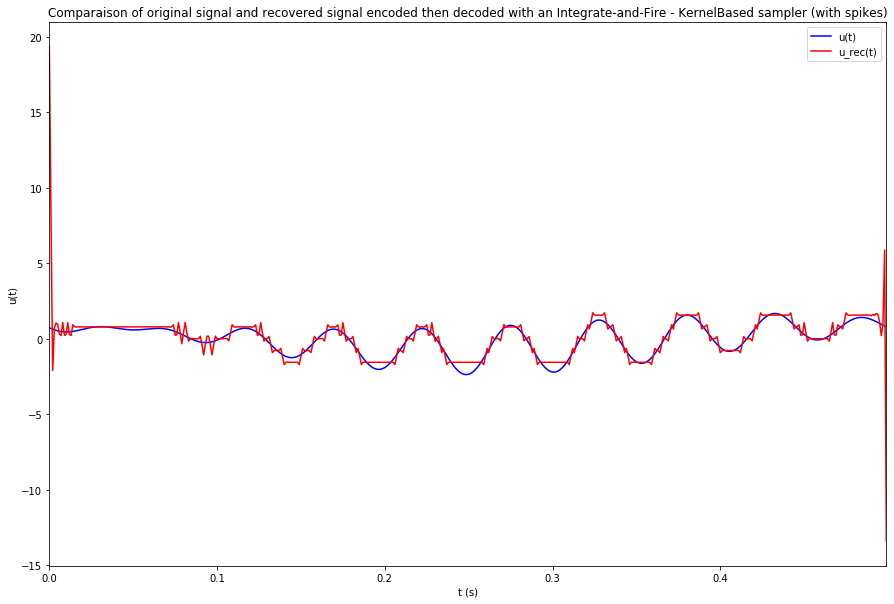

In [12]:
iaf_kernel_based.plotSignalAndRecoveredSignal()

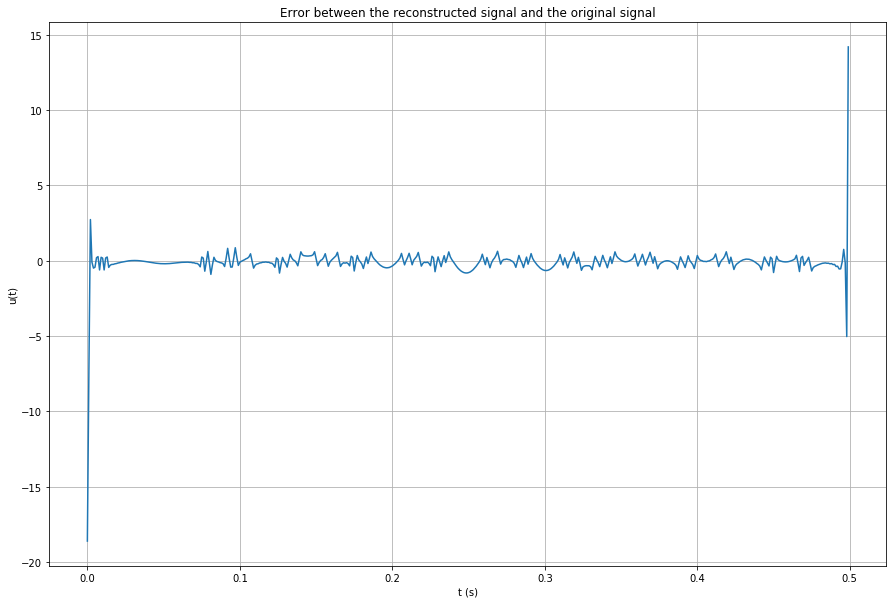

In [13]:
iaf_kernel_based.plotError()

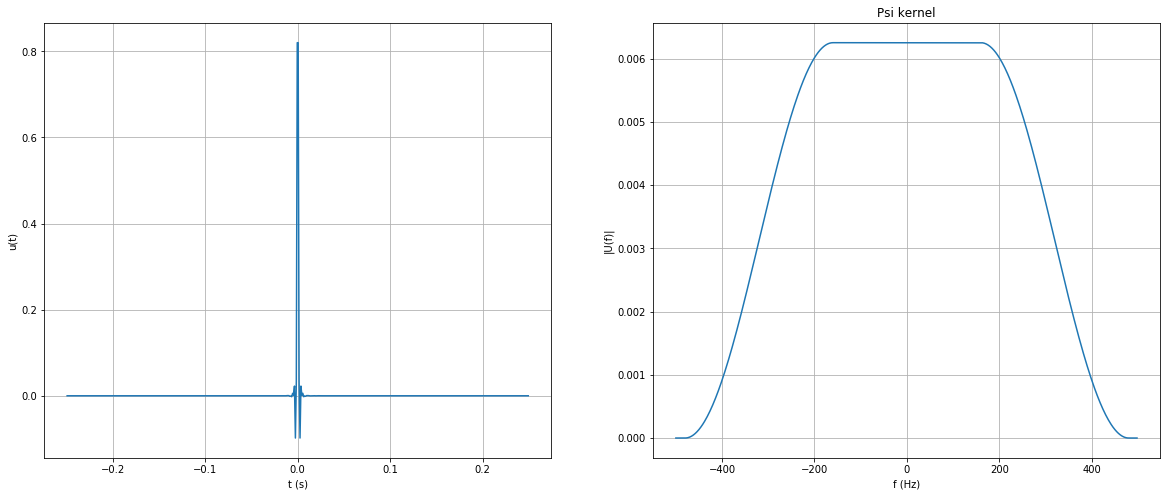

In [14]:
iaf_kernel_based.plotPsiKernel()

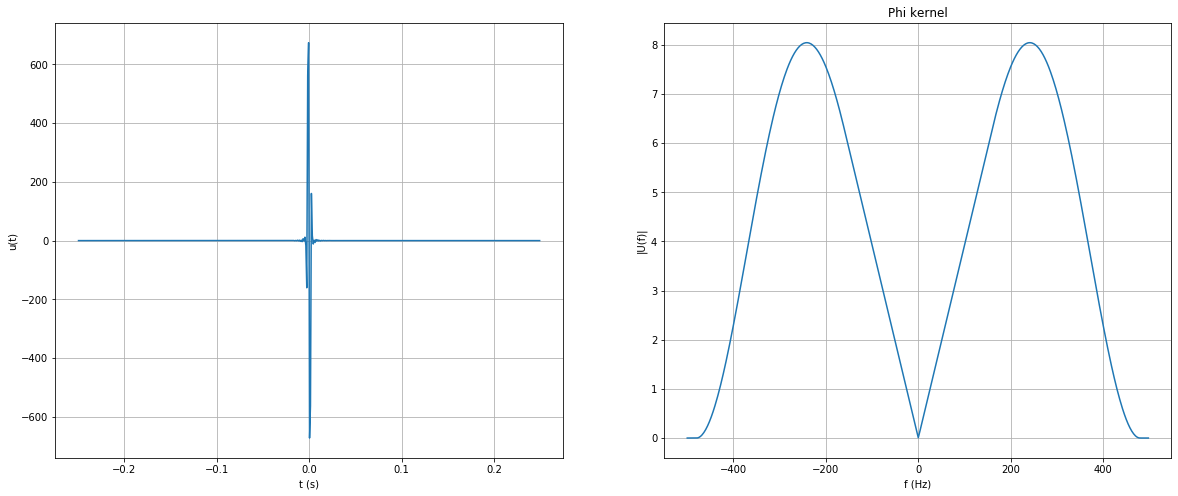

In [15]:
iaf_kernel_based.plotPhiKernel()

In [16]:
print(f'The mean squared error of the signal is : {iaf_kernel_based.computeMeanSquaredError()}')

The mean squared error of the signal is : 677.816879883978


# Experiments

In [17]:
from numpy.fft import fft, fftfreq, irfft
import matplotlib.pyplot as plt
from scipy import signal

In [18]:
dur = 0.5
dt1 = 0.000005
f_max = 64
N_c = 3

In [19]:
bl = BL(dur, dt1, f_max, N_c)
t1, u1 = bl.generate(normalized = True)
u2, t2 = signal.resample(u1, int(u1.shape[0]/10), t1)
u3, t3 = signal.resample(u2, int(u2.shape[0]/10), t2)
u4, t4 = signal.resample(u3, int(u3.shape[0]/10), t3)
dt2 = dt1 * 10
dt3 = dt2 * 10
dt4 = dt3 * 10

In [20]:
alpha = 1
theta = 0.001

gamma = 0.5
Ts = 1/(f_max)

In [21]:
iaf_kernel_based_1 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_1.setSignal(t1, u1, dt1)
iaf_kernel_based_1.encode()
iaf_kernel_based_1.decode()
vtjs_1 = iaf_kernel_based_1.v[np.insert(iaf_kernel_based_1.spikes_idx, 0, 0)]
wjs_1 = iaf_kernel_based_1.ws

In [22]:
iaf_kernel_based_2 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_2.setSignal(t2, u2, dt2)
iaf_kernel_based_2.encode()
iaf_kernel_based_2.decode()
vtjs_2 = iaf_kernel_based_2.v[np.insert(iaf_kernel_based_2.spikes_idx, 0, 0)]
wjs_2 = iaf_kernel_based_2.ws

In [23]:
iaf_kernel_based_3 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_3.setSignal(t3, u3, dt3)
iaf_kernel_based_3.encode()
iaf_kernel_based_3.decode()
vtjs_3 = iaf_kernel_based_3.v[np.insert(iaf_kernel_based_3.spikes_idx, 0, 0)]
wjs_3 = iaf_kernel_based_3.ws

In [24]:
iaf_kernel_based_4 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_4.setSignal(t4, u4, dt4)
iaf_kernel_based_4.encode()
iaf_kernel_based_4.decode()
vtjs_4 = iaf_kernel_based_4.v[np.insert(iaf_kernel_based_4.spikes_idx, 0, 0)]
wjs_4 = iaf_kernel_based_4.ws

No handles with labels found to put in legend.


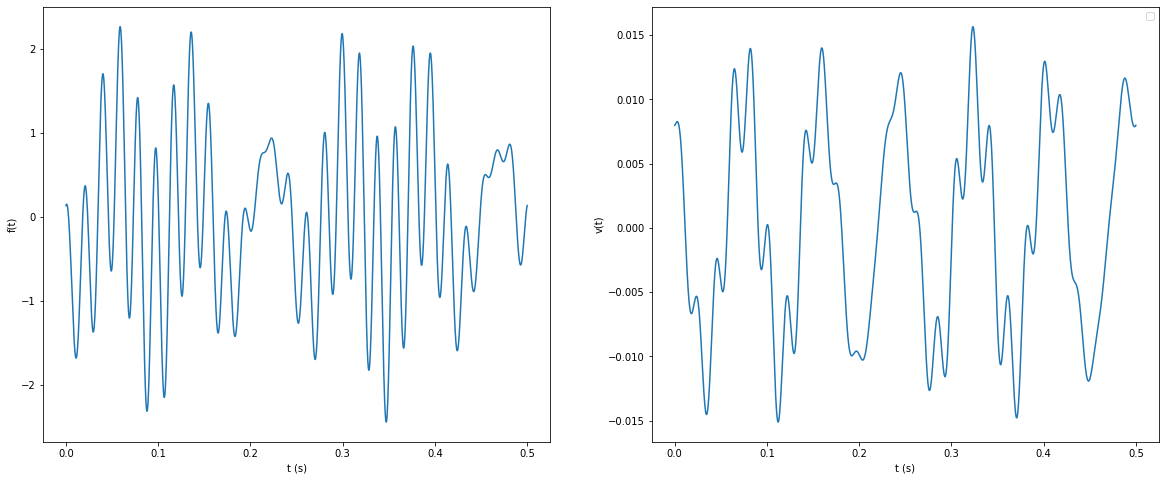

In [25]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.u)
plt.xlabel('t (s)')
plt.ylabel('f(t)')
plt.subplot(1, 2, 2)
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.v)
plt.xlabel('t (s)')
plt.ylabel('v(t)')
plt.legend()

plt.savefig('saved_images/fv.png')

## Effect of dt

### On $w_j$s

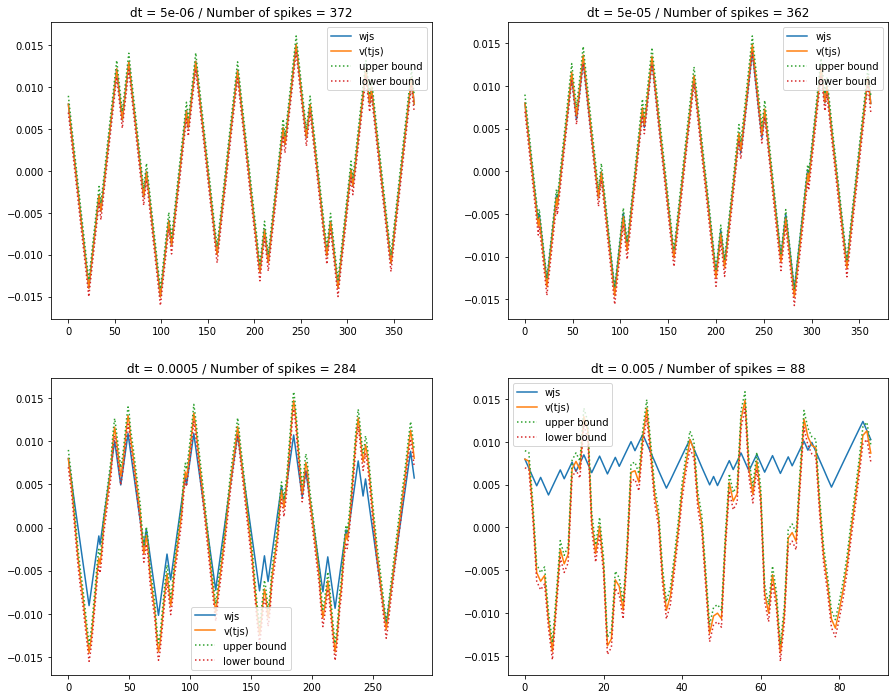

In [26]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'dt = {dt1} / Number of spikes = {iaf_kernel_based_1.getNumberOfSpikes()}')
plt.plot(wjs_1 , label = 'wjs')
plt.plot(vtjs_1, label = 'v(tjs)')
plt.plot(vtjs_1 + theta, ':', label = 'upper bound')
plt.plot(vtjs_1 - theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'dt = {dt2} / Number of spikes = {iaf_kernel_based_2.getNumberOfSpikes()}')
plt.plot(wjs_2 , label = 'wjs')
plt.plot(vtjs_2, label = 'v(tjs)')
plt.plot(vtjs_2 + theta, ':', label = 'upper bound')
plt.plot(vtjs_2 - theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'dt = {dt3} / Number of spikes = {iaf_kernel_based_3.getNumberOfSpikes()}')
plt.plot(wjs_3 , label = 'wjs')
plt.plot(vtjs_3, label = 'v(tjs)')
plt.plot(vtjs_3 + theta, ':', label = 'upper bound')
plt.plot(vtjs_3 - theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'dt = {dt4} / Number of spikes = {iaf_kernel_based_4.getNumberOfSpikes()}')
plt.plot(wjs_4 , label = 'wjs')
plt.plot(vtjs_4, label = 'v(tjs)')
plt.plot(vtjs_4 + theta, ':', label = 'upper bound')
plt.plot(vtjs_4 - theta, ':', label = 'lower bound')
plt.legend()

plt.savefig('saved_images/wjs.png')

### On $s_k$s

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


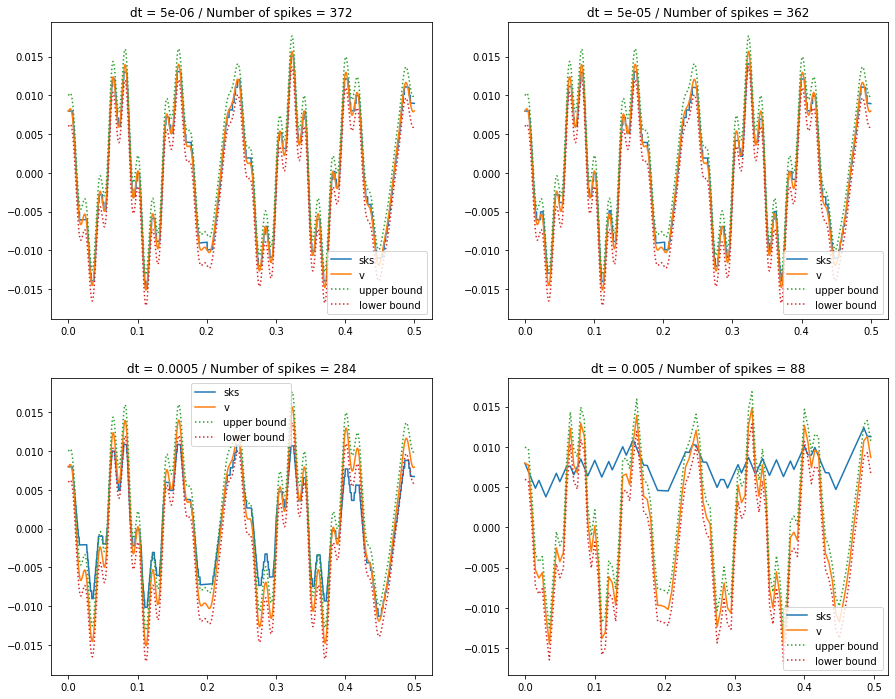

In [27]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'dt = {iaf_kernel_based_1.dt} / Number of spikes = {iaf_kernel_based_1.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.sk , label = 'sks')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.v, label = 'v')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'dt = {iaf_kernel_based_2.dt} / Number of spikes = {iaf_kernel_based_2.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.sk , label = 'sks')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.v, label = 'v')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'dt = {iaf_kernel_based_3.dt} / Number of spikes = {iaf_kernel_based_3.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.sk , label = 'sks')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.v, label = 'v')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'dt = {iaf_kernel_based_4.dt} / Number of spikes = {iaf_kernel_based_4.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.sk , label = 'sks')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.v, label = 'v')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.v - 2*theta, ':', label = 'lower bound')
plt.legend()

plt.savefig('saved_images/sks.png')

In [28]:
thetas = [0.01, 0.001, 0.0001, 0.00001]
alphas = [0.01, 1, 10, 100]

## Effect of $\theta$

In [29]:
iaf_kernel_based_1_1 = IAF_KernelBased(alpha, thetas[0], gamma, Ts)
iaf_kernel_based_1_1.setSignal(t1, u1, dt1)
iaf_kernel_based_1_1.encode()
iaf_kernel_based_1_1.decode()

array([1222.07941922, 1221.44300248, 1220.80574179, ...,  382.50775848,
        382.50058468,  382.49326079])

In [30]:
iaf_kernel_based_1_2 = IAF_KernelBased(alpha, thetas[1], gamma, Ts)
iaf_kernel_based_1_2.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2.encode()
iaf_kernel_based_1_2.decode()

array([  740.58416634,   739.65470631,   738.7244583 , ...,
       -2222.5122703 , -2222.44165587, -2222.37002785])

In [31]:
iaf_kernel_based_1_3 = IAF_KernelBased(alpha, thetas[2], gamma, Ts)
iaf_kernel_based_1_3.setSignal(t1, u1, dt1)
iaf_kernel_based_1_3.encode()
iaf_kernel_based_1_3.decode()

array([  695.39944459,   694.47585465,   693.55151848, ...,
       -2176.71773727, -2176.53724846, -2176.3558016 ])

In [32]:
iaf_kernel_based_1_4 = IAF_KernelBased(alpha, thetas[3], gamma, Ts)
iaf_kernel_based_1_4.setSignal(t1, u1, dt1)
iaf_kernel_based_1_4.encode()
iaf_kernel_based_1_4.decode()

array([  916.40506765,   915.73512382,   915.06448528, ...,
       -1755.78339372, -1755.60514584, -1755.42613028])

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


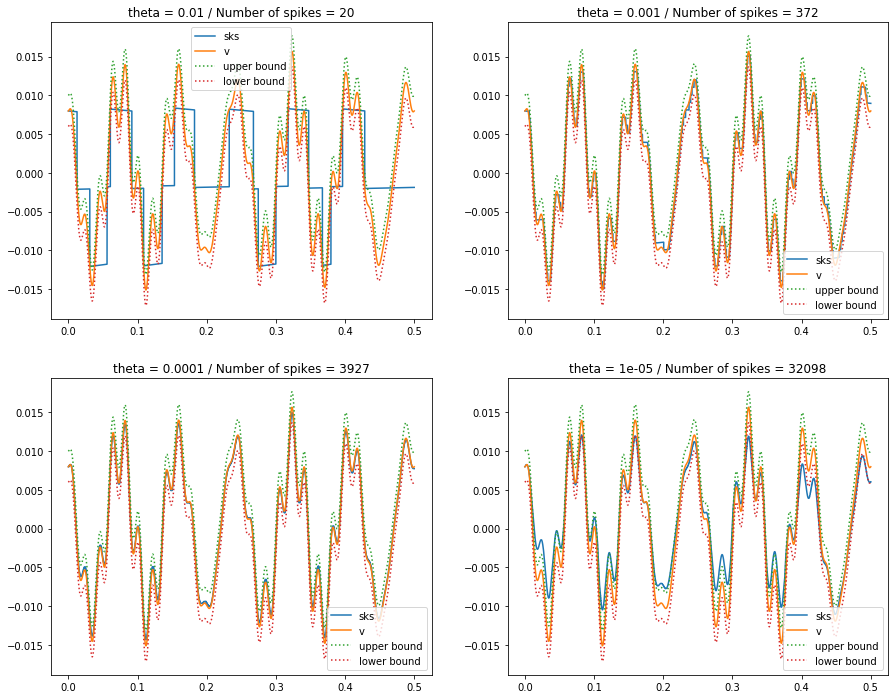

In [33]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'theta = {iaf_kernel_based_1_1.theta} / Number of spikes = {iaf_kernel_based_1_1.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_1.t, iaf_kernel_based_1_1.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_1.t, iaf_kernel_based_1_1.v, label = 'v')
plt.plot(iaf_kernel_based_1_1.t, iaf_kernel_based_1_1.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_1.t, iaf_kernel_based_1_1.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'theta = {iaf_kernel_based_1_2.theta} / Number of spikes = {iaf_kernel_based_1_2.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2.t, iaf_kernel_based_1_2.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2.t, iaf_kernel_based_1_2.v, label = 'v')
plt.plot(iaf_kernel_based_1_2.t, iaf_kernel_based_1_2.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2.t, iaf_kernel_based_1_2.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'theta = {iaf_kernel_based_1_3.theta} / Number of spikes = {iaf_kernel_based_1_3.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_3.t, iaf_kernel_based_1_3.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_3.t, iaf_kernel_based_1_3.v, label = 'v')
plt.plot(iaf_kernel_based_1_3.t, iaf_kernel_based_1_3.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_3.t, iaf_kernel_based_1_3.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'theta = {iaf_kernel_based_1_4.theta} / Number of spikes = {iaf_kernel_based_1_4.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_4.t, iaf_kernel_based_1_4.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_4.t, iaf_kernel_based_1_4.v, label = 'v')
plt.plot(iaf_kernel_based_1_4.t, iaf_kernel_based_1_4.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_4.t, iaf_kernel_based_1_4.v - 2*theta, ':', label = 'lower bound')
plt.legend()

plt.savefig('saved_images/thetas.png')

## Effect of $\alpha$

In [34]:
iaf_kernel_based_1_2_1 = IAF_KernelBased(alphas[0], thetas[1], gamma, Ts)
iaf_kernel_based_1_2_1.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_1.encode()
iaf_kernel_based_1_2_1.decode()

array([  756.88220891,   755.95276283,   755.0225225 , ...,
       -2247.80590457, -2247.73264097, -2247.65835562])

In [35]:
iaf_kernel_based_1_2_2 = IAF_KernelBased(alphas[1], thetas[1], gamma, Ts)
iaf_kernel_based_1_2_2.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_2.encode()
iaf_kernel_based_1_2_2.decode()

array([  740.58416634,   739.65470631,   738.7244583 , ...,
       -2222.5122703 , -2222.44165587, -2222.37002785])

In [36]:
iaf_kernel_based_1_2_3 = IAF_KernelBased(alphas[2], thetas[1], gamma, Ts)
iaf_kernel_based_1_2_3.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_3.encode()
iaf_kernel_based_1_2_3.decode()

array([  572.02810721,   571.09982246,   570.1708143 , ...,
       -2039.86126907, -2039.78754146, -2039.71287259])

In [37]:
iaf_kernel_based_1_2_4 = IAF_KernelBased(alphas[3], thetas[1], gamma, Ts)
iaf_kernel_based_1_2_4.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_4.encode()
iaf_kernel_based_1_2_4.decode()

array([-824.56672648, -825.43818928, -826.30979586, ..., -488.27354251,
       -488.23930708, -488.20474147])

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


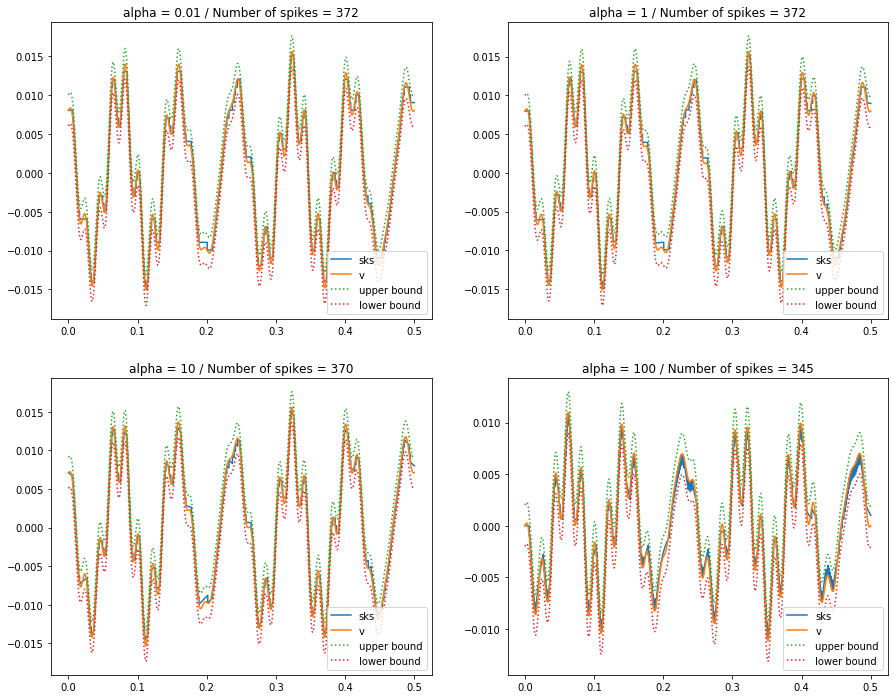

In [38]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'alpha = {iaf_kernel_based_1_2_1.alpha} / Number of spikes = {iaf_kernel_based_1_2_1.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'alpha = {iaf_kernel_based_1_2_2.alpha} / Number of spikes = {iaf_kernel_based_1_2_2.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'alpha = {iaf_kernel_based_1_2_3.alpha} / Number of spikes = {iaf_kernel_based_1_2_3.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'alpha = {iaf_kernel_based_1_2_4.alpha} / Number of spikes = {iaf_kernel_based_1_2_4.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v - 2*theta, ':', label = 'lower bound')
plt.legend()

plt.savefig('saved_images/alphas_good.png')

In [39]:
iaf_kernel_based_1_2_1 = IAF_KernelBased(alphas[0], thetas[0], gamma, Ts)
iaf_kernel_based_1_2_1.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_1.encode()
iaf_kernel_based_1_2_1.decode()

array([1237.36396036, 1236.72844836, 1236.09208685, ...,  394.43375303,
        394.42661319,  394.41931857])

In [40]:
iaf_kernel_based_1_2_2 = IAF_KernelBased(alphas[1], thetas[0], gamma, Ts)
iaf_kernel_based_1_2_2.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_2.encode()
iaf_kernel_based_1_2_2.decode()

array([1222.07941922, 1221.44300248, 1220.80574179, ...,  382.50775848,
        382.50058468,  382.49326079])

In [41]:
iaf_kernel_based_1_2_3 = IAF_KernelBased(alphas[2], thetas[0], gamma, Ts)
iaf_kernel_based_1_2_3.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_3.encode()
iaf_kernel_based_1_2_3.decode()

array([1053.26364306, 1052.62889173, 1051.99340153, ...,  441.55251286,
        441.54633436,  441.53998037])

In [42]:
iaf_kernel_based_1_2_4 = IAF_KernelBased(alphas[3], thetas[0], gamma, Ts)
iaf_kernel_based_1_2_4.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_4.encode()
iaf_kernel_based_1_2_4.decode()

array([ 6.48842333e+00,  6.49933509e+00,  6.51024155e+00, ...,
       -3.12166380e-13, -3.12207429e-13, -3.12248305e-13])

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


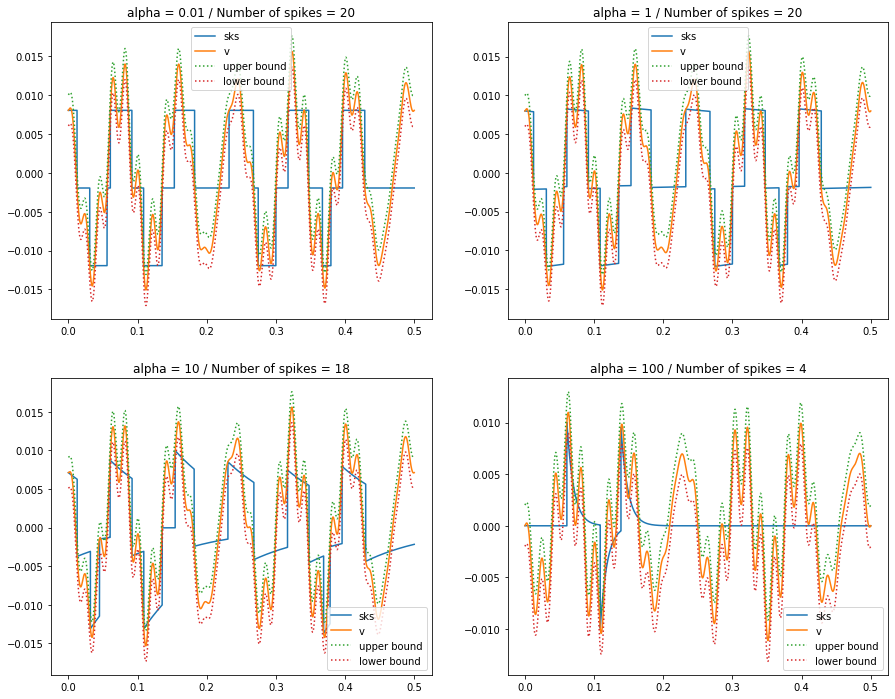

In [43]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'alpha = {iaf_kernel_based_1_2_1.alpha} / Number of spikes = {iaf_kernel_based_1_2_1.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'alpha = {iaf_kernel_based_1_2_2.alpha} / Number of spikes = {iaf_kernel_based_1_2_2.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'alpha = {iaf_kernel_based_1_2_3.alpha} / Number of spikes = {iaf_kernel_based_1_2_3.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v - 2*theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'alpha = {iaf_kernel_based_1_2_4.alpha} / Number of spikes = {iaf_kernel_based_1_2_4.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v + 2*theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v - 2*theta, ':', label = 'lower bound')
plt.legend()

plt.savefig('saved_images/alphas_bad.png')

## Reconstruction

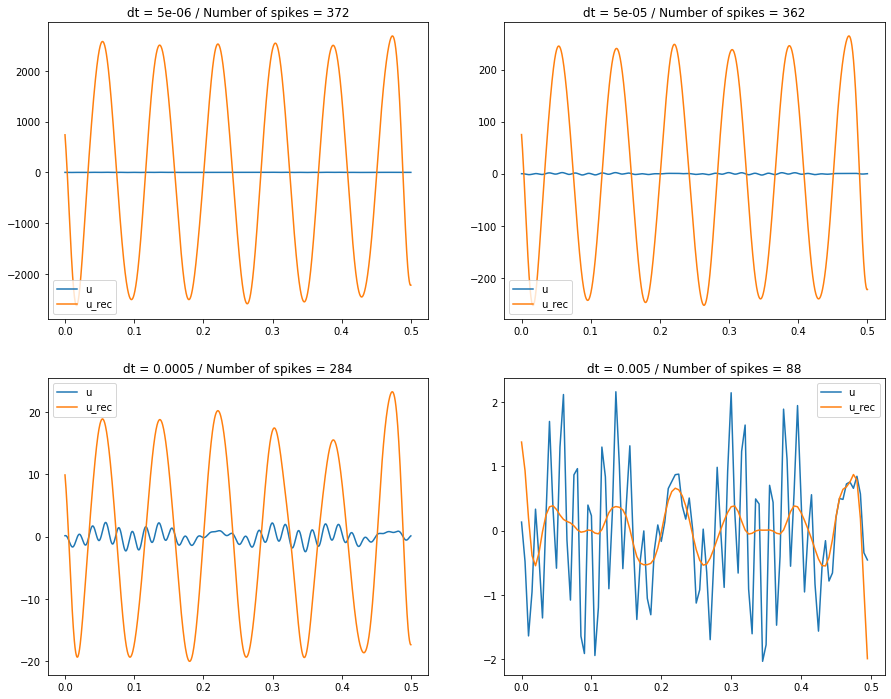

In [44]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'dt = {iaf_kernel_based_1.dt} / Number of spikes = {iaf_kernel_based_1.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.u , label = 'u')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'dt = {iaf_kernel_based_2.dt} / Number of spikes = {iaf_kernel_based_2.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.u , label = 'u')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'dt = {iaf_kernel_based_3.dt} / Number of spikes = {iaf_kernel_based_3.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.u , label = 'u')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'dt = {iaf_kernel_based_4.dt} / Number of spikes = {iaf_kernel_based_4.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.u , label = 'u')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.u_rec, label = 'u_rec')
plt.legend()

plt.savefig('saved_images/reconstruct_dt_effect.png')

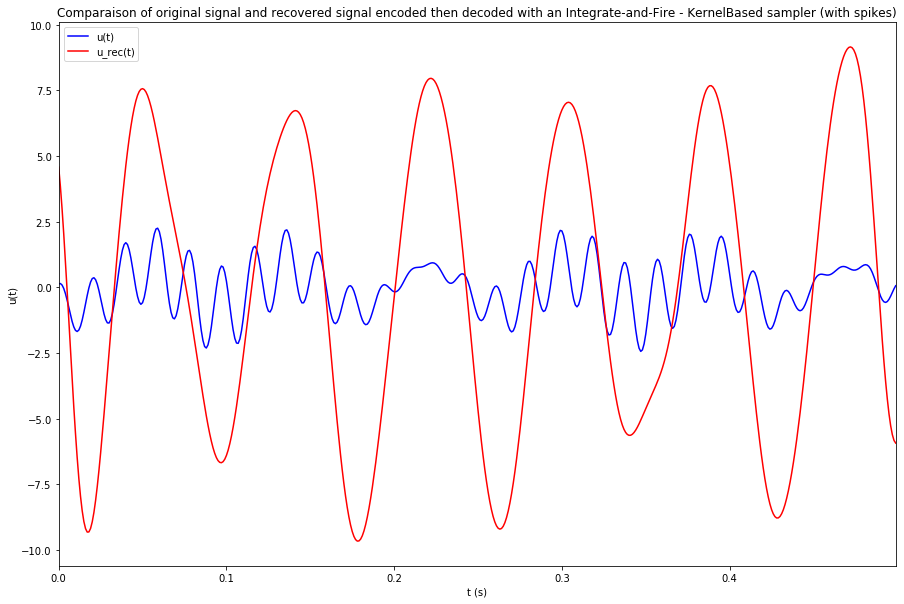

In [45]:
u5, t5 = signal.resample(u3, int(u3.shape[0]/2), t3)
dt5 = dt3 * 2

iaf_kernel_based_5 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_5.setSignal(t5, u5, dt5)
iaf_kernel_based_5.encode()
iaf_kernel_based_5.decode()

iaf_kernel_based_5.plotSignalAndRecoveredSignal()

## Effect of $\gamma$

In [46]:
gammas = [0.125, 0.5, 0.625, 1]
Tss = [Ts/2, Ts/5, Ts/10, Ts/13]

In [47]:
iaf_kernel_based_5_1 = IAF_KernelBased(alpha, theta, gammas[0], Ts)
iaf_kernel_based_5_1.setSignal(t5, u5, dt5)
iaf_kernel_based_5_1.encode()
iaf_kernel_based_5_1.decode()

array([  4.68120703,   4.01857712,   3.24109685,   2.3617132 ,
         1.39605773,   0.36203888,  -0.72030258,  -1.83011341,
        -2.94517424,  -4.04324321,  -5.1023702 ,  -6.10139063,
        -7.02048222,  -7.84160312,  -8.54893362,  -9.12947638,
        -9.57252863,  -9.87095146, -10.0204846 , -10.02001016,
        -9.87154151,  -9.5800429 ,  -9.15325304,  -8.60138607,
        -7.93682263,  -7.17346286,  -6.32713429,  -5.4140972 ,
        -4.45142084,  -3.45630011,  -2.44538335,  -1.43520193,
        -0.44077956,   0.52360609,   1.44573046,   2.31454129,
         3.12106503,   3.85826057,   4.52098223,   5.10571755,
         5.61128551,   6.03763437,   6.38676858,   6.66146333,
         6.86613012,   7.00578685,   7.08635832,   7.11390706,
         7.09467848,   7.03490683,   6.94061687,   6.81748933,
         6.67072837,   6.50497107,   6.3242008 ,   6.13145899,
         5.92963794,   5.72042085,   5.50511351,   5.28419118,
         5.05813013,   4.82645544,   4.58886304,   4.34

In [48]:
iaf_kernel_based_5_2 = IAF_KernelBased(alpha, theta, gammas[1], Ts)
iaf_kernel_based_5_2.setSignal(t5, u5, dt5)
iaf_kernel_based_5_2.encode()
iaf_kernel_based_5_2.decode()

array([ 4.57585393e+00,  3.84679869e+00,  2.99452008e+00,  2.03761718e+00,
        9.97952282e-01, -1.00136590e-01, -1.23069158e+00, -2.36709836e+00,
       -3.48294026e+00, -4.55292475e+00, -5.55367086e+00, -6.46440321e+00,
       -7.26751108e+00, -7.94895431e+00, -8.49850557e+00, -8.90984348e+00,
       -9.18042362e+00, -9.31131692e+00, -9.30681371e+00, -9.17399312e+00,
       -8.92220851e+00, -8.56253480e+00, -8.10720820e+00, -7.56908650e+00,
       -6.96115530e+00, -6.29608461e+00, -5.58593039e+00, -4.84181498e+00,
       -4.07381153e+00, -3.29085569e+00, -2.50073895e+00, -1.71023522e+00,
       -9.25169912e-01, -1.50651738e-01,  6.08804603e-01,  1.34902943e+00,
        2.06607666e+00,  2.75606971e+00,  3.41510334e+00,  4.03917667e+00,
        4.62423931e+00,  5.16617397e+00,  5.66094831e+00,  6.10467450e+00,
        6.49381925e+00,  6.82531464e+00,  7.09674667e+00,  7.30646734e+00,
        7.45372965e+00,  7.53877358e+00,  7.56287097e+00,  7.52832525e+00,
        7.43842455e+00,  

In [49]:
iaf_kernel_based_5_3 = IAF_KernelBased(alpha, theta, gammas[2], Ts)
iaf_kernel_based_5_3.setSignal(t5, u5, dt5)
iaf_kernel_based_5_3.encode()
iaf_kernel_based_5_3.decode()

array([ 6.94057904e+08, -7.07279337e+07, -8.34749368e+08, -8.33915037e+08,
       -1.59717367e+09, -1.59557729e+09, -1.59398251e+09, -1.59238933e+09,
       -1.59079774e+09, -1.58920774e+09, -1.58761932e+09, -1.58603250e+09,
       -1.58444726e+09,  9.02973934e+09,  9.02071411e+09,  8.24760578e+09,
        7.47527017e+09,  6.70370651e+09,  5.93291403e+09,  3.83342624e+09,
        2.50012902e+09,  4.04072300e+08, -9.25797283e+08, -2.25433766e+09,
       -3.58155016e+09, -4.14334399e+09, -4.70457630e+09, -5.26524767e+09,
       -4.49589292e+09, -5.05677286e+09, -4.28762649e+09, -3.51924888e+09,
       -3.51573139e+09, -2.74812529e+09, -2.74537854e+09, -2.74263453e+09,
       -2.73989326e+09, -3.50124687e+09, -3.49774737e+09, -3.49425137e+09,
       -5.58431670e+09, -6.90820089e+09, -7.46666973e+09, -8.02458038e+09,
       -8.58193340e+09, -7.80926362e+09, -8.36683185e+09, -7.59437707e+09,
       -6.82269437e+09, -6.05178296e+09, -3.95217636e+09, -2.61876044e+09,
       -5.22585153e+08,  

In [50]:
iaf_kernel_based_5_4 = IAF_KernelBased(alpha, theta, gammas[3], Ts)
iaf_kernel_based_5_4.setSignal(t5, u5, dt5)
iaf_kernel_based_5_4.encode()
iaf_kernel_based_5_4.decode()

array([ 5.05370201,  4.21896388,  3.17641681,  1.96582117,  0.63762538,
       -0.75035868, -2.13693381, -3.46184361, -4.67003662, -5.71555194,
       -6.56463827, -7.19784387, -7.61088229, -7.81419379, -7.83124304,
       -7.69571754, -7.44787246, -7.13041356, -6.78425763, -6.44462027,
       -6.13778724, -5.87888214, -5.67084046, -5.5046804 , -5.36103037,
       -5.2127432 , -5.02834018, -4.77588118, -4.42691114, -3.96002798,
       -3.36371365, -2.63814608, -1.79575644, -0.86052709,  0.13396371,
        1.14748933,  2.13686977,  3.05998914,  3.87973776,  4.56746036,
        5.10556929,  5.48900573,  5.72545273,  5.83421432,  5.84393915,
        5.78936864,  5.70749819,  5.6335214 ,  5.59701366,  5.6187449 ,
        5.70846518,  5.86390105,  6.07107283,  6.30590296,  6.53694752,
        6.72895897,  6.84692057,  6.86007798,  6.7455883 ,  6.49134313,
        6.09769246,  5.57782543,  4.95681011,  4.26931997,  3.5563158 ,
        2.86100276,  2.22448893,  1.68158394,  1.25720454,  0.96

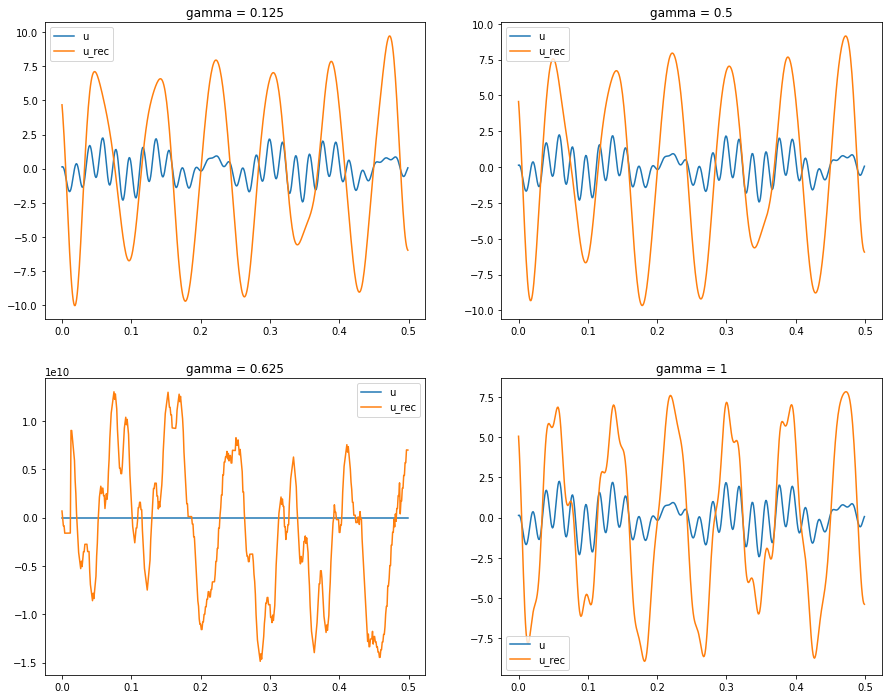

In [51]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'gamma = {iaf_kernel_based_5_1.gamma}')
plt.plot(iaf_kernel_based_5_1.t, iaf_kernel_based_5_1.u , label = 'u')
plt.plot(iaf_kernel_based_5_1.t, iaf_kernel_based_5_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'gamma = {iaf_kernel_based_5_2.gamma}')
plt.plot(iaf_kernel_based_5_2.t, iaf_kernel_based_5_2.u , label = 'u')
plt.plot(iaf_kernel_based_5_2.t, iaf_kernel_based_5_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'gamma = {iaf_kernel_based_5_3.gamma}')
plt.plot(iaf_kernel_based_5_3.t, iaf_kernel_based_5_3.u , label = 'u')
plt.plot(iaf_kernel_based_5_3.t, iaf_kernel_based_5_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'gamma = {iaf_kernel_based_5_4.gamma}')
plt.plot(iaf_kernel_based_5_4.t, iaf_kernel_based_5_4.u , label = 'u')
plt.plot(iaf_kernel_based_5_4.t, iaf_kernel_based_5_4.u_rec, label = 'u_rec')
plt.legend()

## Effect of $T_s$

In [52]:
iaf_kernel_based_5_2_1 = IAF_KernelBased(alpha, theta, gamma, Tss[0])
iaf_kernel_based_5_2_1.setSignal(t5, u5, dt5)
iaf_kernel_based_5_2_1.encode()
iaf_kernel_based_5_2_1.decode()

array([ 8.26266029,  7.5809986 ,  6.2411108 ,  4.34004345,  2.0410649 ,
       -0.44783914, -2.90131088, -5.10525458, -6.88219492, -8.1097943 ,
       -8.73036269, -8.75100988, -8.23568723, -7.29153958, -6.05251567,
       -4.66305003, -3.26392707, -1.98152763, -0.92056326, -0.15974674,
        0.25058479,  0.28979706, -0.03225318, -0.67501771, -1.568207  ,
       -2.61473704, -3.69649203, -4.68326041, -5.44465123, -5.86394821,
       -5.85226806, -5.36100595, -4.39048099, -2.993194  , -1.27071325,
        0.63573396,  2.56004934,  4.3295921 ,  5.78473566,  6.79713826,
        7.28443955,  7.21955015,  6.63354953,  5.61192092,  4.28479332,
        2.81241289,  1.36764792,  0.11747796, -0.79452489, -1.26297443,
       -1.231313  , -0.69739659,  0.28638805,  1.61838129,  3.1577311 ,
        4.73834823,  6.18550066,  7.33352309,  8.04309016,  8.21636986,
        7.80855255,  6.83438564,  5.36882136,  3.54127382,  1.52371843,
       -0.48649456, -2.28751801, -3.69541529, -4.56551306, -4.81

In [53]:
iaf_kernel_based_5_2_2 = IAF_KernelBased(alpha, theta, gamma, Tss[1])
iaf_kernel_based_5_2_2.setSignal(t5, u5, dt5)
iaf_kernel_based_5_2_2.encode()
iaf_kernel_based_5_2_2.decode()

array([ 8.08623584e+00,  6.69851741e+00,  3.44899037e+00,  3.67649393e-01,
       -1.31303604e+00, -1.85556918e+00, -2.17140681e+00, -2.68880901e+00,
       -3.16958062e+00, -3.32480149e+00, -3.23741877e+00, -3.15204333e+00,
       -3.10475738e+00, -2.92180879e+00, -2.48930644e+00, -1.88074444e+00,
       -1.24108174e+00, -6.66545929e-01, -2.22284261e-01,  2.41822951e-02,
        6.76425418e-02,  2.74609947e-02,  6.06766109e-02,  1.79494976e-01,
        1.81384048e-01, -2.00743723e-01, -1.04773085e+00, -2.12595110e+00,
       -3.00386325e+00, -3.33480454e+00, -3.08462049e+00, -2.51301358e+00,
       -1.92222683e+00, -1.40229742e+00, -8.08088898e-01,  2.99129824e-02,
        1.09024295e+00,  2.14837340e+00,  2.94559754e+00,  3.35237901e+00,
        3.39824289e+00,  3.19734817e+00,  2.86178176e+00,  2.44990282e+00,
        1.95732371e+00,  1.35545807e+00,  6.56034885e-01, -6.34730678e-02,
       -7.06577174e-01, -1.20705676e+00, -1.49254450e+00, -1.41178328e+00,
       -7.85794897e-01,  

In [54]:
iaf_kernel_based_5_2_3 = IAF_KernelBased(alpha, theta, gamma, Tss[2])
iaf_kernel_based_5_2_3.setSignal(t5, u5, dt5)
iaf_kernel_based_5_2_3.encode()
iaf_kernel_based_5_2_3.decode()

array([ 8.55201052e+00,  3.17949883e+00, -1.32463603e+00, -3.81875770e-02,
        2.58160355e-01, -2.30567786e-01, -1.29352912e+00, -1.74023086e+00,
       -1.55347252e+00, -1.55643112e+00, -1.55310903e+00, -1.55209694e+00,
       -1.56253166e+00, -1.71698150e+00, -1.15202894e+00, -6.46360337e-01,
       -9.16516258e-01, -4.11744070e-01,  1.50461003e-01,  2.69325808e-04,
       -9.41261519e-03,  6.49101864e-04, -3.20377088e-03, -1.26213095e-02,
       -1.19928302e-02,  1.50675375e-01, -2.44679880e-01, -1.31668509e+00,
       -1.70380986e+00, -1.55217409e+00, -1.70127953e+00, -1.15075020e+00,
       -6.44008656e-01, -9.06406653e-01, -4.00037708e-01, -1.98567278e-03,
        2.47722720e-01,  1.30727494e+00,  1.71437997e+00,  1.54871896e+00,
        1.53919252e+00,  1.56141474e+00,  1.71644125e+00,  1.15340184e+00,
        6.44491838e-01,  9.07651887e-01,  4.09946693e-01,  9.31596340e-03,
       -4.12632058e-01, -1.05329315e+00, -2.20204737e-01, -2.20713876e-01,
       -1.22315610e+00, -

In [55]:
iaf_kernel_based_5_2_4 = IAF_KernelBased(alpha, theta, gamma, Tss[3])
iaf_kernel_based_5_2_4.setSignal(t5, u5, dt5)
iaf_kernel_based_5_2_4.encode()
iaf_kernel_based_5_2_4.decode()

array([ 9.01935308e+00,  7.70353620e-01, -6.40633000e-01,  1.19770361e-01,
        1.13801446e-01, -7.48256043e-02, -1.15526889e+00, -1.27194912e+00,
       -1.18017572e+00, -1.19067075e+00, -1.21768907e+00, -1.19385834e+00,
       -1.18930217e+00, -1.27942442e+00, -1.08425348e+00, -1.34044187e-01,
       -1.07096669e+00, -1.14990198e-01,  7.68973879e-02, -1.37716826e-02,
       -7.22499651e-03,  4.23002473e-03,  1.78525360e-03, -6.82972756e-04,
       -2.01713752e-02,  5.75471255e-02, -3.36745252e-02, -1.17203871e+00,
       -1.25428947e+00, -1.16786324e+00, -1.27805448e+00, -1.08956781e+00,
       -1.35358921e-01, -1.06829929e+00, -9.44853593e-02,  1.64767485e-02,
        2.23674976e-02,  1.16009824e+00,  1.26528446e+00,  1.18620152e+00,
        1.19248364e+00,  1.19270392e+00,  1.27995131e+00,  1.08584149e+00,
        1.34965000e-01,  1.06469478e+00,  9.89052899e-02,  6.55363450e-03,
       -8.81204665e-02, -1.14424851e+00, -1.88872761e-02,  6.51234414e-03,
       -1.20801620e+00, -

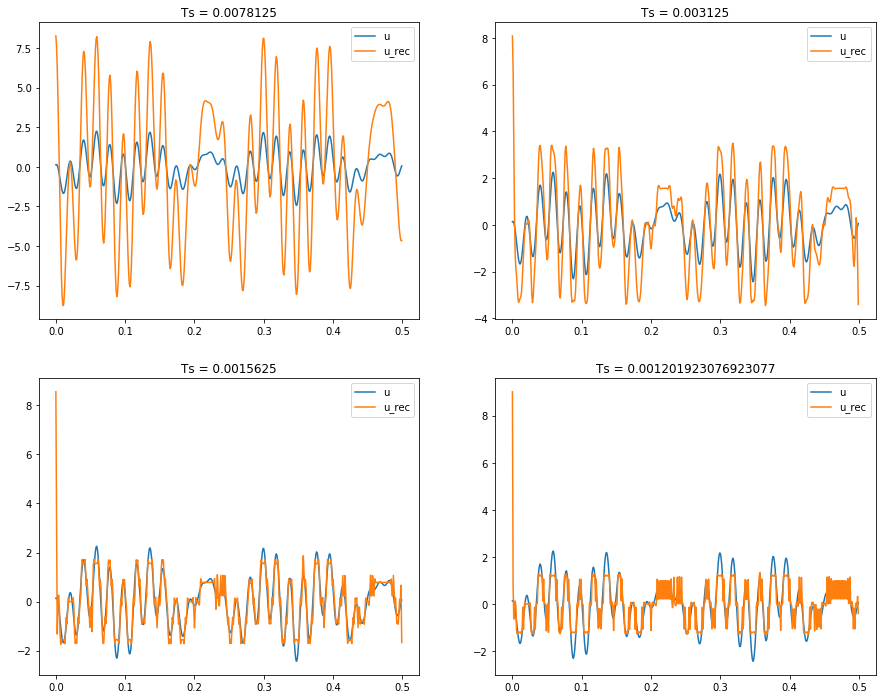

In [56]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'Ts = {iaf_kernel_based_5_2_1.Ts}')
plt.plot(iaf_kernel_based_5_2_1.t, iaf_kernel_based_5_2_1.u , label = 'u')
plt.plot(iaf_kernel_based_5_2_1.t, iaf_kernel_based_5_2_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'Ts = {iaf_kernel_based_5_2_2.Ts}')
plt.plot(iaf_kernel_based_5_2_2.t, iaf_kernel_based_5_2_2.u , label = 'u')
plt.plot(iaf_kernel_based_5_2_2.t, iaf_kernel_based_5_2_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'Ts = {iaf_kernel_based_5_2_3.Ts}')
plt.plot(iaf_kernel_based_5_2_3.t, iaf_kernel_based_5_2_3.u , label = 'u')
plt.plot(iaf_kernel_based_5_2_3.t, iaf_kernel_based_5_2_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'Ts = {iaf_kernel_based_5_2_4.Ts}')
plt.plot(iaf_kernel_based_5_2_4.t, iaf_kernel_based_5_2_4.u , label = 'u')
plt.plot(iaf_kernel_based_5_2_4.t, iaf_kernel_based_5_2_4.u_rec, label = 'u_rec')
plt.legend()

plt.savefig('saved_images/Tss.png')

## Result

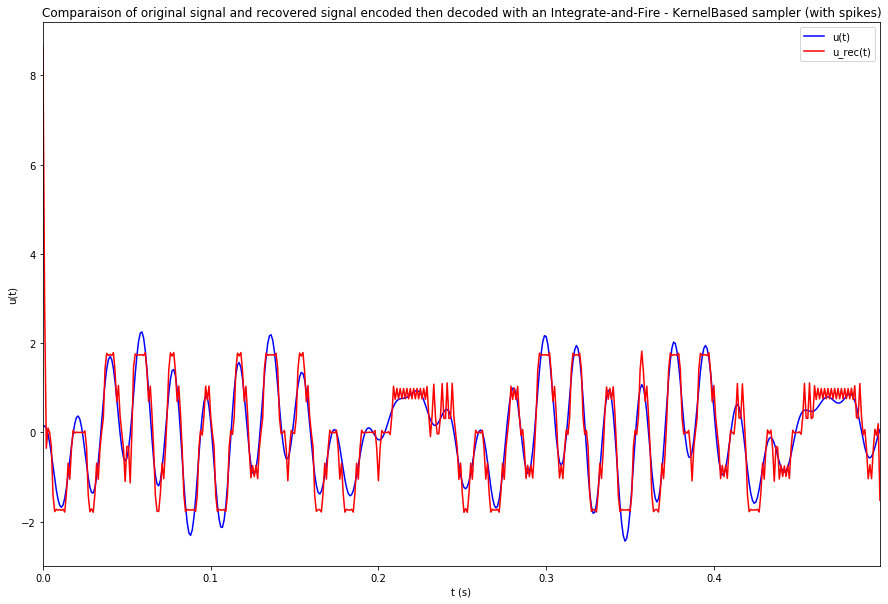

In [57]:
iaf_kernel_based_6 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_6.setSignal(t5, u5, dt5)
iaf_kernel_based_6.encode()
iaf_kernel_based_6.decode(gamma = 1, Ts = Ts/9)

iaf_kernel_based_6.plotSignalAndRecoveredSignal()

plt.savefig('saved_images/result.png')

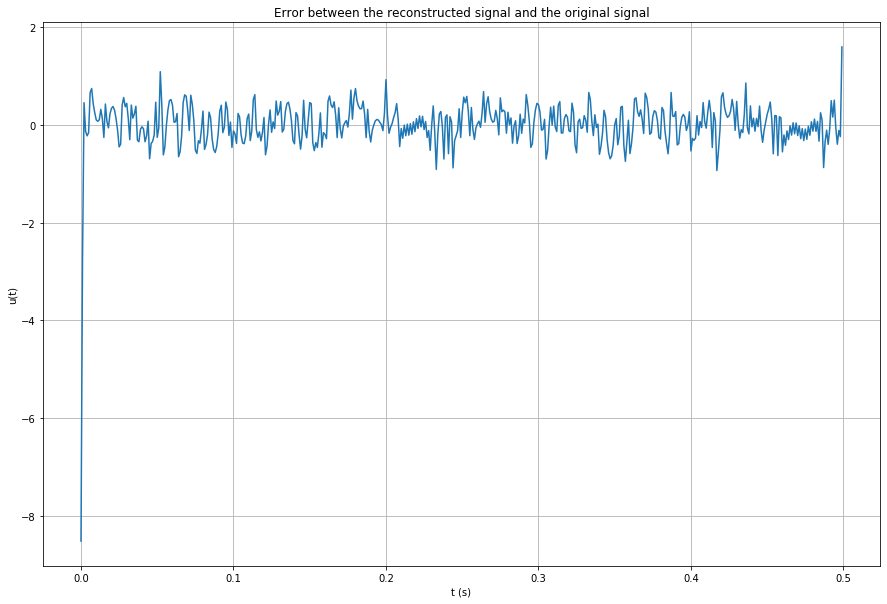

In [58]:
iaf_kernel_based_6.plotError()

In [59]:
print(f'Number of spikes : {iaf_kernel_based_6.getNumberOfSpikes()}')
print(f'Mean squared error : {iaf_kernel_based_6.computeMeanSquaredError()}')

Number of spikes : 253
Mean squared error : 138.0971493654208
